In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#lib that rank features based on their impact on the performance

In [3]:
df = pd.read_csv("earnings_misstatements_dataset.csv")
df.head()

,any_restatement,restatement_fraud,restatement_error,restatement_other,restatement_accrules,restatement_chng_netincome,restatement_neg_chng_netincome,gvkey,fyear,cboard,...,debt_ratio,capex,rd_to_at_zero,rd_to_sales_zero,rd_missing,sum_own_sq,return_on_asset,stkname,instown_perc,sector
0,0,0,0,0,0,0,0,1004,1998,1,...,0.265071,0.026090,0.0,0.0,1,0.0,0.053175,AAR CORP,0.847949,Wholesale
1,0,0,0,0,0,0,0,1004,1999,1,...,0.249589,0.049724,0.0,0.0,1,0.0,0.057348,AAR CORP,0.730089,Wholesale
2,0,0,0,0,0,0,0,1004,2000,1,...,0.279030,0.030154,0.0,0.0,1,0.0,0.047454,AAR CORP,0.771506,Wholesale
3,0,0,0,0,0,0,0,1004,2001,1,...,0.275896,0.018713,0.0,0.0,1,0.0,0.026403,AAR CORP,0.824848,Wholesale
4,0,0,0,0,0,0,0,1004,2002,1,...,0.366410,0.017054,0.0,0.0,1,0.0,-0.082989,AAR CORP,0.856124,Wholesale


In [4]:
df.columns

Index(['any_restatement', 'restatement_fraud', 'restatement_error',
       'restatement_other', 'restatement_accrules',
       'restatement_chng_netincome', 'restatement_neg_chng_netincome', 'gvkey',
       'fyear', 'cboard', 'supermajor', 'ppill', 'goldenparachute', 'eindex',
       'sum_own', 'tobins_q', 'ln_q', 'ln_at', 'debt_ratio', 'capex',
       'rd_to_at_zero', 'rd_to_sales_zero', 'rd_missing', 'sum_own_sq',
       'return_on_asset', 'stkname', 'instown_perc', 'sector'],
      dtype='object')

In [5]:
df.isnull().sum()

any_restatement                   0
restatement_fraud                 0
restatement_error                 0
restatement_other                 0
restatement_accrules              0
restatement_chng_netincome        0
restatement_neg_chng_netincome    0
gvkey                             0
fyear                             0
cboard                            0
supermajor                        0
ppill                             0
goldenparachute                   0
eindex                            0
sum_own                           0
tobins_q                          0
ln_q                              0
ln_at                             0
debt_ratio                        0
capex                             0
rd_to_at_zero                     0
rd_to_sales_zero                  0
rd_missing                        0
sum_own_sq                        0
return_on_asset                   0
stkname                           0
instown_perc                      3
sector                      

In [6]:
df['instown_perc'].head()

0    0.847949
1    0.730089
2    0.771506
3    0.824848
4    0.856124
Name: instown_perc, dtype: float64

In [7]:
df = df.dropna()

In [8]:
cat_value = df.select_dtypes(include=['object', 'category']).columns
cat_value

Index(['stkname', 'sector'], dtype='object')

In [9]:
df.describe()

,any_restatement,restatement_fraud,restatement_error,restatement_other,restatement_accrules,restatement_chng_netincome,restatement_neg_chng_netincome,gvkey,fyear,cboard,...,ln_q,ln_at,debt_ratio,capex,rd_to_at_zero,rd_to_sales_zero,rd_missing,sum_own_sq,return_on_asset,instown_perc
count,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,...,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000
mean,0.061418,0.001448,0.002120,0.007341,0.051491,0.029727,0.022385,38553.693481,2009.128419,0.509073,...,0.517786,7.740528,0.227155,0.047912,0.028833,0.042879,0.411984,24.424045,0.043739,0.773306
std,0.240101,0.038020,0.045992,0.085368,0.221004,0.169836,0.147937,52646.908374,5.767086,0.499931,...,0.498977,1.662943,0.187444,0.047270,0.050744,0.084301,0.492205,100.332188,0.092680,0.193592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1004.000000,1998.000000,0.000000,...,-0.342959,4.228905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472028,0.116720
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6829.000000,2004.000000,0.000000,...,0.133266,6.520515,0.058462,0.017207,0.000000,0.000000,0.000000,0.000000,0.017967,0.666039
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13204.000000,2009.000000,1.000000,...,0.423772,7.595760,0.215077,0.033693,0.000000,0.000000,0.000000,0.195364,0.048254,0.804975
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31587.000000,2014.000000,1.000000,...,0.806679,8.791735,0.343491,0.062105,0.036755,0.043092,1.000000,3.930306,0.085932,0.909031
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,287462.000000,2018.000000,1.000000,...,2.012015,12.104390,0.870407,0.263305,0.254825,0.489803,1.000000,717.918500,0.261171,1.150487


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['sector_en'] = encoder.fit_transform(df['sector'])
df['stkname_en'] = encoder.fit_transform(df['stkname'])

df.head()

,any_restatement,restatement_fraud,restatement_error,restatement_other,restatement_accrules,restatement_chng_netincome,restatement_neg_chng_netincome,gvkey,fyear,cboard,...,rd_to_at_zero,rd_to_sales_zero,rd_missing,sum_own_sq,return_on_asset,stkname,instown_perc,sector,sector_en,stkname_en
0,0,0,0,0,0,0,0,1004,1998,1,...,0.0,0.0,1,0.0,0.053175,AAR CORP,0.847949,Wholesale,47,9
1,0,0,0,0,0,0,0,1004,1999,1,...,0.0,0.0,1,0.0,0.057348,AAR CORP,0.730089,Wholesale,47,9
2,0,0,0,0,0,0,0,1004,2000,1,...,0.0,0.0,1,0.0,0.047454,AAR CORP,0.771506,Wholesale,47,9
3,0,0,0,0,0,0,0,1004,2001,1,...,0.0,0.0,1,0.0,0.026403,AAR CORP,0.824848,Wholesale,47,9
4,0,0,0,0,0,0,0,1004,2002,1,...,0.0,0.0,1,0.0,-0.082989,AAR CORP,0.856124,Wholesale,47,9


In [11]:
df = df.drop(columns=['sector', 'stkname'], axis='columns')


In [12]:
df.head()

,any_restatement,restatement_fraud,restatement_error,restatement_other,restatement_accrules,restatement_chng_netincome,restatement_neg_chng_netincome,gvkey,fyear,cboard,...,debt_ratio,capex,rd_to_at_zero,rd_to_sales_zero,rd_missing,sum_own_sq,return_on_asset,instown_perc,sector_en,stkname_en
0,0,0,0,0,0,0,0,1004,1998,1,...,0.265071,0.026090,0.0,0.0,1,0.0,0.053175,0.847949,47,9
1,0,0,0,0,0,0,0,1004,1999,1,...,0.249589,0.049724,0.0,0.0,1,0.0,0.057348,0.730089,47,9
2,0,0,0,0,0,0,0,1004,2000,1,...,0.279030,0.030154,0.0,0.0,1,0.0,0.047454,0.771506,47,9
3,0,0,0,0,0,0,0,1004,2001,1,...,0.275896,0.018713,0.0,0.0,1,0.0,0.026403,0.824848,47,9
4,0,0,0,0,0,0,0,1004,2002,1,...,0.366410,0.017054,0.0,0.0,1,0.0,-0.082989,0.856124,47,9


## EDA

In [13]:
df['any_restatement'].unique()

array([0, 1])

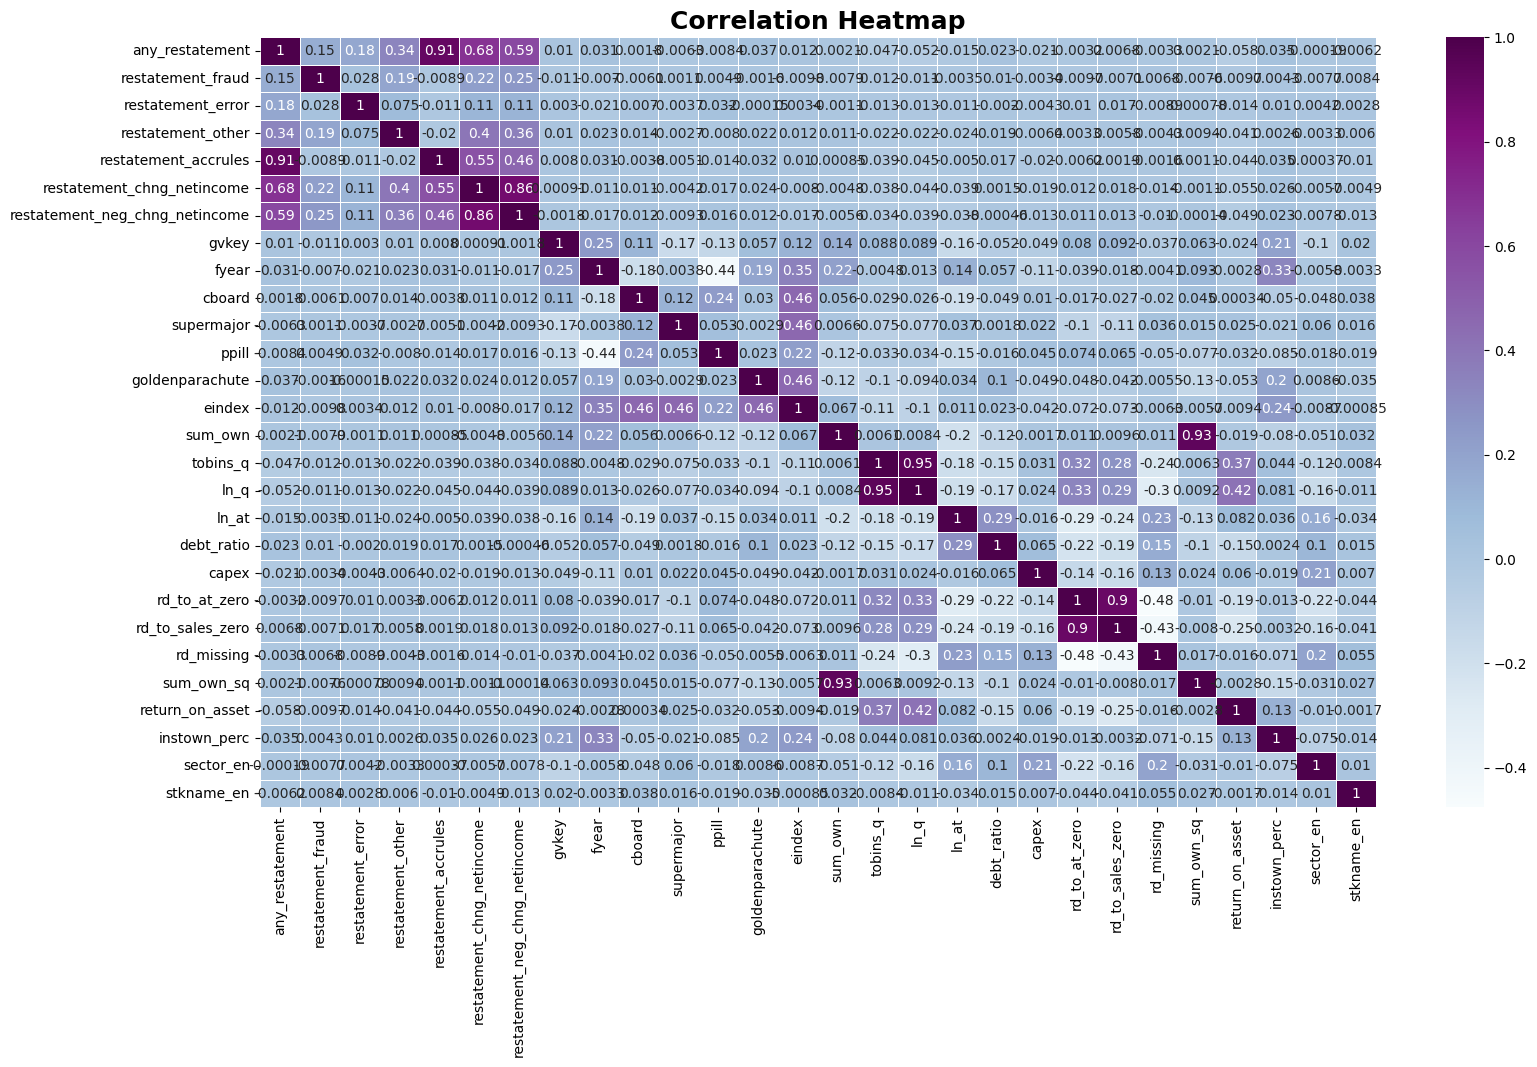

In [14]:
# Correlation heatmap


plt.figure(figsize= (18,10))
numeric_df = df.select_dtypes(include=[float, int])

sns.heatmap(
    numeric_df.corr(),
    annot= True,
    cmap="BuPu",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
plt.show()

In [45]:
X = df.drop(columns = ['restatement_fraud', 'restatement_error','cboard', 'restatement_other','gvkey','fyear', 'restatement_accrules', 'restatement_chng_netincome', 'any_restatement','restatement_neg_chng_netincome'], axis = 'columns')
y = df['any_restatement']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=48, stratify=y)

In [47]:
X_train.head()

,supermajor,ppill,goldenparachute,eindex,sum_own,tobins_q,ln_q,ln_at,debt_ratio,capex,rd_to_at_zero,rd_to_sales_zero,rd_missing,sum_own_sq,return_on_asset,instown_perc,sector_en,stkname_en
1850,0,1,1,3,0.000,1.835954,0.607564,5.726773,0.000000,0.012428,0.097033,0.124683,0,0.000000,0.110673,0.627048,26,545
18110,0,0,1,3,0.144,0.896736,-0.108993,11.575250,0.064812,0.000000,0.000000,0.000000,1,0.020736,-0.001954,0.812381,23,957
122,1,1,1,4,0.000,1.058207,0.056576,10.620110,0.039406,0.005148,0.000000,0.000000,1,0.000000,0.022803,0.765035,23,57
12628,0,0,1,3,2.536,1.014061,0.013963,8.274892,0.235035,0.036594,0.000000,0.000000,1,6.431296,0.027701,1.014036,41,946
7809,0,1,0,1,0.000,4.893847,1.587979,9.782449,0.076975,0.155869,0.098589,0.147302,0,0.000000,0.174210,0.628033,18,2215


In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Base XGBoost model
xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)

# Hyperparameter grid (Limited to avoid CPU overload)
param_grid = {
    'n_estimators': [100, 200, 300],   # More trees = better accuracy, but slower training
    'max_depth': [3, 5, 7],            # Controls tree complexity
    'learning_rate': [0.01, 0.05, 0.1], # Lower LR = Better accuracy, but slower convergence
    'scale_pos_weight': [1, 5, 10],     # Handles class imbalance (5-10 if fraud cases are rare)
    'subsample': [0.8, 1.0],            # Prevents overfitting by sampling data
    'colsample_bytree': [0.8, 1.0]      # Feature selection for each tree
}

# Grid Search CV (Using 3-fold CV to reduce CPU load)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',  # You can also use 'f1' if fraud cases are very rare
    cv=3,  # 3-fold cross-validation for efficiency
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Train model with Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8}


In [57]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = XGBClassifier(
    colsample_bytree= 0.8,
    n_estimators=200, 
    max_depth=3, 
    learning_rate=0.1, 
    scale_pos_weight=10, 
    random_state=42
)

# model = RandomForestClassifier(n_estimators=100, class_weight="balanced")

model.fit(X_train,y_train)

y_predict = model.predict(X_test)



In [58]:
model.score(X_test,y_test)

0.8463606286186931

In [59]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4539
           1       0.11      0.22      0.15       297

    accuracy                           0.85      4836
   macro avg       0.53      0.55      0.53      4836
weighted avg       0.89      0.85      0.87      4836

